In [54]:
import pandas as pd 

In [55]:
data=pd.read_csv("Medical_insurance.csv")

In [56]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [57]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


In [58]:
data.shape

(2772, 7)

In [59]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 2772
Number of Columns 7


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [61]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [62]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,2772.000000,2772,2772.000000,2772.000000,2772,2772,2772.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,1406,NaN,NaN,2208,766,NaN
mean,39.109668,NaN,30.701349,1.101732,NaN,NaN,13261.369959
std,14.081459,NaN,6.129449,1.214806,NaN,NaN,12151.768945
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.220000,0.000000,NaN,NaN,4687.797000
50%,39.000000,NaN,30.447500,1.000000,NaN,NaN,9333.014350
75%,51.000000,NaN,34.770000,2.000000,NaN,NaN,16577.779500


In [63]:
data['sex'].unique()
data['sex']=data['sex'].map({'female':0,'male':1})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southwest':1,'southeast':2,
                   'northwest':3,'northeast':4})

In [64]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [65]:
X = data.drop(['charges'],axis=1)
y = data['charges']

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [68]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [69]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [70]:
df1

,Actual,Lr,svm,rf,gr
1106,8988.15875,10333.540399,9436.886047,9461.190286,10479.471148
1321,28101.33305,36778.218745,9573.938917,28196.686617,27879.086385
2313,12032.32600,8917.535067,9513.814889,13189.242720,12119.909134
2274,1682.59700,5657.129303,9130.007698,1661.946031,1938.267603
1432,3393.35635,6524.049025,9107.050356,4853.060273,7898.839867
...,...,...,...,...,...
930,2927.06470,9769.707790,9182.211956,2932.278382,3363.839146
2610,6858.47960,7159.669851,9319.718587,7324.367834,7238.181567
1700,34838.87300,28257.111036,9154.476309,34738.275677,34854.626802
100,6186.12700,8050.277469,9326.331834,6328.605726,6485.652317


In [71]:
import matplotlib.pyplot as plt

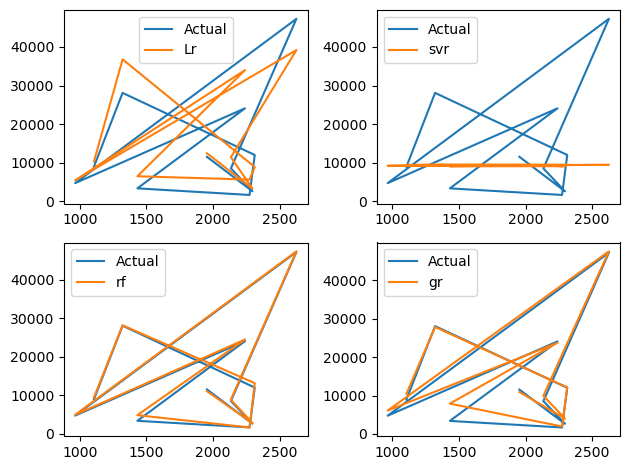

In [72]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()

plt.legend()

In [73]:
from sklearn import metrics

In [74]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [75]:
print(score1,score2,score3,score4)

0.7398864322395977 -0.07101717623183945 0.9487019777710514 0.8772268996916247


In [76]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [77]:
print(s1,s2,s3,s4)

4167.3014359745075 8283.670856655164 1326.605390883423 2266.6538511104072


In [78]:
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

In [79]:
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [80]:
new_pred = rf.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  42522.66151899999


In [81]:
rf = RandomForestRegressor()
rf.fit(X,y)

RandomForestRegressor()

In [82]:
new_pred = rf.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  42716.20109699998


In [83]:
rf = RandomForestRegressor()
rf.fit(X,y)

RandomForestRegressor()

In [84]:
import joblib

In [85]:
joblib.dump(rf,'model_joblib_rf')

['model_joblib_rf']

In [86]:
model = joblib.load('model_joblib_rf')

In [87]:
model.predict(df)

array([42572.6812])

In [88]:
import joblib

In [89]:
# Insurance cost prediction GUI
import tkinter as tk

def show_entry():

    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())

    model = joblib.load('model_joblib_rf')
    result=model.predict([[p1,p2,p3,p4,p5,p6]])

    tk.Label(master,text="Insurance Cost").grid(row=7)
    tk.Label(master,text=result).grid(row=8)


master= tk.Tk()
master.title("Insurance Cost Prediction")
label=tk.Label(master,text='Insurance Cost Prediction',bg="black", fg="white").grid(row=0,columnspan=2)

tk.Label(master,text = "Enter your age").grid(row=1)
tk.Label(master,text = "Male or Female [1/0]").grid(row=2)
tk.Label(master,text = "Enter your BMI value").grid(row=3)
tk.Label(master,text = "Enter number of children").grid(row=4)
tk.Label(master,text = "Smoker Yes/No [1/0]").grid(row=5)
tk.Label(master,text = "Region [1-4]").grid(row=6)

e1=tk.Entry(master)
e2=tk.Entry(master)
e3=tk.Entry(master)
e4=tk.Entry(master)
e5=tk.Entry(master)
e6=tk.Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

tk.Button(master,text="Predict",command=show_entry).grid()

master.mainloop()
